In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

###  Q3: Total sales in Barisal

In [3]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(f.total_price)" \
        "FROM ecomdb_star_schema.fact_table f " \
        "JOIN ecomdb_star_schema.store_dim s on s.store_key = f.store_key " \
        "WHERE s.district = 'BARISAL' " \
        "GROUP BY s.district"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('2897237.75'))]

In [4]:
df = pd.DataFrame(list(records), columns=['division', 'total_price'])
df

,division,total_price
0,BARISAL,2897237.75


In [5]:
df['total_price'] = pd.to_numeric(df['total_price'],errors='coerce')

In [6]:
df1= df.set_index(['division'])

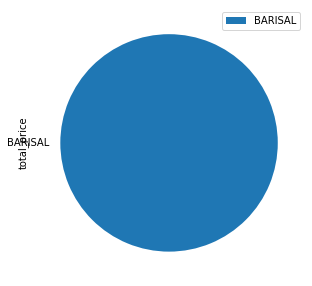

In [7]:
plot = df1.plot.pie(y='total_price', figsize=(5, 5))